## Importing necessary libraries

In [ ]:
!pip install --upgrade pycaret[full]

In [2]:
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd

## Reading the CSV File

In [24]:
## This dataset contain both features and labels
url = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/Employee_Attrition_Data_80.csv'
df = pd.read_csv(url)

## Overview of the Dataset

In [52]:
df.shape

(11399, 10)

In [53]:
# Code snippet 4
# Checking the null values list and counts
df.isnull().sum()

,0
avg_monthly_hrs,0
department,0
filed_complaint,0
last_evaluation,0
n_projects,0
recently_promoted,0
salary,0
satisfaction,0
status,0
tenure,0


## Null Value Treatment

In [54]:
# Code snippet 5
# Replacing the missing values with median values
df['satisfaction'] = df['satisfaction'].fillna(df['satisfaction'].median())
df['last_evaluation'] = df['last_evaluation'].fillna(df['last_evaluation'].median())
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [55]:
# Replacing missing values with the mode for 'department' column
df['department'].fillna(df['department'].mode().iloc[0], inplace=True)


In [56]:
# Checking the null values list and counts after clean up step
df.isnull().sum()

,0
avg_monthly_hrs,0
department,0
filed_complaint,0
last_evaluation,0
n_projects,0
recently_promoted,0
salary,0
satisfaction,0
status,0
tenure,0


In [57]:
# Replacing null values with zeroes as appropriate
df['filed_complaint'] = df['filed_complaint'].fillna(0)
df['recently_promoted'] = df['recently_promoted'].fillna(0)

In [58]:
# Checking the null values list after cleaning
df.isnull().sum()

,0
avg_monthly_hrs,0
department,0
filed_complaint,0
last_evaluation,0
n_projects,0
recently_promoted,0
salary,0
satisfaction,0
status,0
tenure,0


## Exploratory Data Analysis using SweetViz

In [59]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [60]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df)
# Convert the report to HTML
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Importing pycaret libraries

In [66]:
#To import all Classification related Pycaret libraries
from pycaret.classification import *

In [67]:
# Setting up the classification ML experiment
classification_model_setup = setup(df,  target = 'status')

,Description,Value
0,Session id,4835
1,Target,status
2,Target type,Binary
3,Target mapping,"Employed: 0, Left: 1"
4,Original data shape,"(11399, 10)"
5,Transformed data shape,"(11399, 23)"
6,Transformed train set shape,"(7979, 23)"
7,Transformed test set shape,"(3420, 23)"
8,Numeric features,7
9,Categorical features,2


## Model Building(PYCARET)

### Compare Models

In [68]:
# Running the multiple algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9747,0.9854,0.9747,0.9747,0.9744,0.9289,0.9296,1.0510
et,Extra Trees Classifier,0.9739,0.9833,0.9739,0.9738,0.9737,0.9272,0.9276,0.7700
xgboost,Extreme Gradient Boosting,0.9734,0.9861,0.9734,0.9734,0.9732,0.9256,0.9262,0.3800
catboost,CatBoost Classifier,0.9734,0.9870,0.9734,0.9733,0.9732,0.9257,0.9262,4.7010
lightgbm,Light Gradient Boosting Machine,0.9728,0.9870,0.9728,0.9727,0.9726,0.9240,0.9245,0.4130
gbc,Gradient Boosting Classifier,0.9663,0.9814,0.9663,0.9661,0.9660,0.9060,0.9064,1.3510
dt,Decision Tree Classifier,0.9590,0.9489,0.9590,0.9597,0.9592,0.8884,0.8888,0.2380
knn,K Neighbors Classifier,0.9279,0.9636,0.9279,0.9327,0.9293,0.8097,0.8122,0.2760
ada,Ada Boost Classifier,0.9253,0.9631,0.9253,0.9252,0.9252,0.7940,0.7941,0.4410
lr,Logistic Regression,0.7951,0.8165,0.7951,0.7754,0.7743,0.3422,0.3615,0.4830


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=4835, verbose=0,
                       warm_start=False)

### Create and Select Model

In [69]:
# Creating the model with the best algorithm based on the above results
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9862,0.9939,0.9862,0.9862,0.9862,0.9617,0.9618
1,0.9762,0.9846,0.9762,0.9762,0.9759,0.9330,0.9337
2,0.9699,0.9716,0.9699,0.9699,0.9696,0.9153,0.9161
3,0.9749,0.9836,0.9749,0.9749,0.9747,0.9296,0.9302
4,0.9674,0.9798,0.9674,0.9672,0.9671,0.9089,0.9094
5,0.9699,0.9795,0.9699,0.9699,0.9696,0.9156,0.9164
6,0.9762,0.9956,0.9762,0.9762,0.9759,0.9333,0.9340
7,0.9787,0.9883,0.9787,0.9787,0.9785,0.9405,0.9410
8,0.9749,0.9957,0.9749,0.9750,0.9747,0.9297,0.9305


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=4835, verbose=0,
                       warm_start=False)

### Plot Model

#### Auc

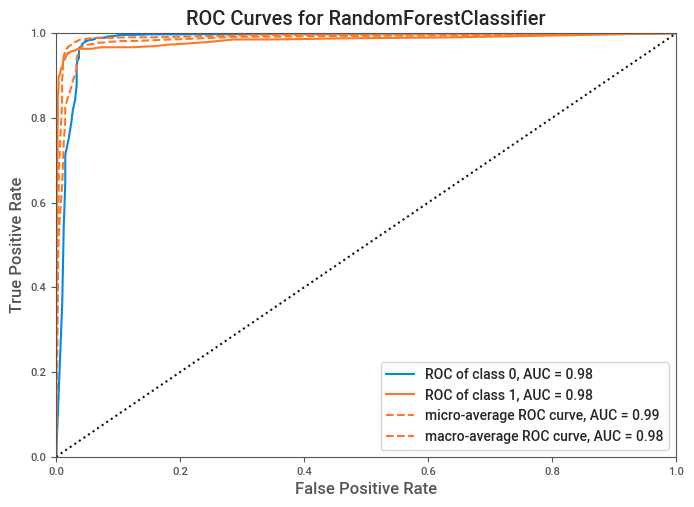

In [71]:
plot_model(model, plot = 'auc')

#### Confusion Matrix

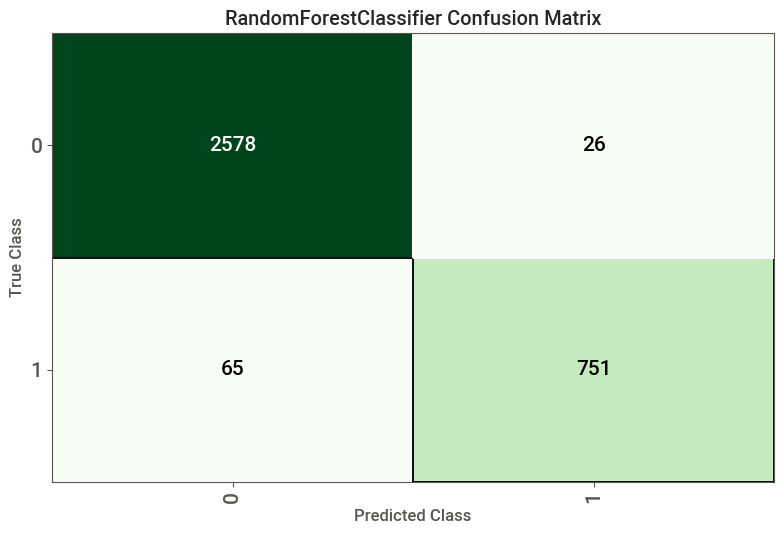

In [72]:
plot_model(model, plot = 'confusion_matrix')

#### Feature Importance

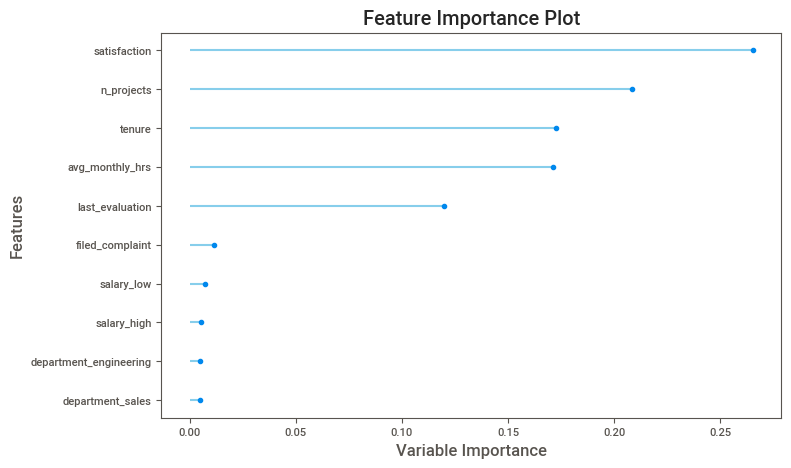

In [73]:
plot_model(model, plot = 'feature')

### Final Model

In [74]:
final_model = finalize_model(model)
final_model


Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['avg_monthly_hrs',
                                             'filed_complaint',
                                             'last_evaluation', 'n_projects',
                                             'recently_promoted',
                                             'satisfaction', 'tenure'],
                                    transformer=SimpleImputer(ad...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=4835, verbose=0,
                                        warm_start=False))],
         verbose=False)

### Predicting Y values for the unseen data

In [75]:
#Predicting the values using the best algorithms
url2 = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/Employee_Attrition_Data_unseen.csv'
unseen_data = pd.read_csv(url2)

In [76]:
unseen_data.shape

(2848, 11)

In [77]:
unseen_predictions = predict_model(final_model, data=unseen_data)
unseen_predictions.tail(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9796,0.9874,0.9796,0.9796,0.9795,0.9426,0.9430


,Unnamed: 0,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status,prediction_label,prediction_score
2838,14239,242,finance,NaN,0.781111,6,NaN,low,0.669866,5.0,Left,Employed,0.78
2839,14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,3.0,Left,Left,0.99
2840,14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,3.0,Employed,Employed,1.00
2841,14242,157,support,NaN,0.707167,5,NaN,low,0.834708,4.0,Employed,Employed,0.92
2842,14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,2.0,Employed,Employed,0.97
2843,14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,5.0,Employed,Employed,0.98
2844,14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,2.0,Employed,Employed,1.00
2845,14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,5.0,Left,Left,0.90
2846,14247,130,IT,NaN,0.757183,4,NaN,medium,0.641304,3.0,Employed,Employed,0.99
2847,14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,3.0,Employed,Employed,1.00


## Install H2O

In [79]:
# Method 2 - Installing the H2O AI Package for Advanced ML and Deep Learning packages
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=141b8389062e1383eba15fe167f80eda57dd6568010b227f61aa260d58996d98
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


## Importing H2O Libraries

In [80]:
# Importing into current Working Session
import h2o
from h2o.automl import H2OAutoML

In [81]:
# Initializing the H2O Server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsmgqoj0u
  JVM stdout: /tmp/tmpsmgqoj0u/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsmgqoj0u/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_tma6p8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Reading the CSV File to a dataframe

In [82]:
# Converting Pandas dataframe to H2O dataframe
url1 = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/Employee_Attrition_Data_80.csv'
df1 = pd.read_csv(url1)
hf = h2o.H2OFrame(df1)
hf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
221,engineering,nan,0.932868,4,nan,low,0.829896,Left,5
232,support,nan,nan,3,nan,low,0.834544,Employed,2
184,sales,nan,0.78883,3,nan,medium,0.834988,Employed,3
206,sales,nan,0.575688,4,nan,low,0.424764,Employed,2
249,sales,nan,0.845217,3,nan,low,0.779043,Employed,3
140,sales,nan,0.589097,4,nan,medium,0.66002,Employed,4
121,sales,1,0.625399,3,nan,low,0.835571,Employed,3
150,engineering,nan,0.644586,4,nan,low,0.796683,Employed,3
215,engineering,1,0.524114,3,nan,medium,0.715005,Employed,7
269,support,nan,0.909364,5,nan,medium,0.994037,Employed,2


In [85]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_monthly_hrs,11399.0,200.028687,50.983747,49.000000,155.000000,199.000000,245.000000,310.0
filed_complaint,1660.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
last_evaluation,10161.0,0.718315,0.172875,0.317279,0.563165,0.724270,0.871039,1.0
n_projects,11399.0,3.773577,1.251376,1.000000,3.000000,4.000000,5.000000,7.0
recently_promoted,236.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
satisfaction,11260.0,0.619642,0.250200,0.040058,0.449826,0.648531,0.823520,1.0
tenure,11260.0,3.497158,1.465926,2.000000,3.000000,3.000000,4.000000,10.0


## Building a Model (H2O)

In [86]:
# Splitting the data to train and test
splits = hf.split_frame(ratios = [0.8])
# Assigning first split to train variable
train = splits[0]
# Assigning first split to test variable
test = splits[1]

In [87]:
# Invoking the Auto advanced ML and Deep learning algorithms restricting run time to 60 seconds
aml = H2OAutoML(max_runtime_secs = 30)
# Training using train data and testing with test data
aml.train(y = "status", training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


### Top 5 Models

In [88]:
# Displaying the best algorithm scores
aml.leaderboard.head(20)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20241111_181602,0.975507,0.129221,0.95739,0.0595229,0.176678,0.0312152
GBM_1_AutoML_1_20241111_181602,0.973633,0.175708,0.952023,0.057258,0.203321,0.0413394
XGBoost_1_AutoML_1_20241111_181602,0.973565,0.146949,0.955277,0.0587044,0.185159,0.0342837
XGBoost_2_AutoML_1_20241111_181602,0.961464,0.485999,0.897894,0.0716436,0.385753,0.148806
GLM_1_AutoML_1_20241111_181602,0.821198,0.433123,0.524251,0.255935,0.376005,0.14138


In [99]:
out = h2o.get_model(aml.leaderboard[0,'model_id'])
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20241111_181602',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20241111_181602'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241111_181602_training_py_2_sid_98ae',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241111_181602_training_py_2_sid_98ae'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241111_181602_training_py_2_sid_98ae',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241111_181602_training_py_2_sid_98ae'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [101]:
out

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


### Model Performance

In [102]:
#Check model performace in the test data
#Getting the prediction metrics
perf = aml.leader.model_performance(test)
# Displaying the performance metrics
perf

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.031348974826432056
RMSE: 0.1770564170721639
LogLoss: 0.13116261491038622
AUC: 0.9739773521076743
AUCPR: 0.9547313422162069
Gini: 0.9479547042153487
Null degrees of freedom: 2216
Residual degrees of freedom: 2213
Null deviance: 2365.7592969590046
Residual deviance: 581.5750345126527
AIC: 589.5750345126527

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6143273767205785
          Employed    Left    Error    Rate
--------  ----------  ------  -------  -------------
Employed  1701        18      0.0105   (18.0/1719.0)
Left      55          443     0.1104   (55.0/498.0)
Total     1756        461     0.0329   (73.0/2217.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.614327     0.923879  142
max f2                       0.614327     0.902976  142
max f0point5                 0.822721     0.950486  125
max accuracy                 0.66426      0.967073  140
max precision                0.997782     1         0
max recall                   0.00160203   1         395
max specificity              0.997782     1         0
max absolute_mcc             0.614327     0.904007  142
max min_per_class_accuracy   0.0761469    0.923695  236
max mean_per_class_accuracy  0.614327     0.939544  142
max tns                      0.997782     1719      0
max fns                      0.997782     488       0
max fps                      0.000840845  1719      399
max tps                      0.00160203   498       395
max tnr                      0.997782     1         0
max fnr                      0.997782     0.97992   0
max fpr                      0.000840845  1         399
max tpr                      0.00160203   1         395

Gains/Lift Table: Avg response rate: 22.46 %, avg score: 21.84 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103744                   0.996971           4.45181    4.45181            1                0.997461    1                           0.997461            0.0461847       0.0461847                  345.181   345.181            0.0461847
2        0.0202977                   0.996353           4.45181    4.45181            1                0.996589    1                           0.997035            0.0441767       0.0903614                  345.181   345.181            0.0903614
3        0.030221                    0.995981           4.45181    4.45181            1                0.996195    1                           0.996759            0.0441767       0.134538                   345.181   345.181            0.134538
4        0.0401443                   0.995369           4.45181    4.45181            1                0.995695    1                           0.996496            0.0441767       0.178715                   345.181   345.181            0.178715
5        0.0500677                   0.994694           4.45181    4.45181            1                0.99502     1                           0.996203            0.0441767       0.222892                   345.181   345.181            0.222892
6        0.100135                    0.98795            4.4117     4.43175            0.990991         0.991873    0.995495                    0.994038            0.220884        0.443775                   341.17    343.175            0.443193
7        0.150203                    0.968433           4.4117     4.42

### Predict the Target using Unseen Data

In [91]:
#Predicting the values using the best algorithms

client_data = unseen_data
hf_client = h2o.H2OFrame(client_data)
hf_client

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Unnamed: 0,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
11401,310,nan,nan,0.784191,7,nan,low,0.0811467,Left,4
11402,201,nan,nan,0.878813,3,nan,low,0.565888,Employed,2
11403,192,engineering,nan,nan,3,nan,low,0.747069,Employed,2
11404,215,support,1,0.392792,4,nan,low,0.214693,Employed,4
11405,210,sales,nan,0.897564,3,nan,medium,0.568702,Employed,3
11406,308,sales,nan,0.839597,6,nan,medium,0.112365,Left,5
11407,278,sales,nan,0.738571,2,nan,medium,0.90922,Employed,2
11408,130,sales,nan,0.52546,2,nan,medium,0.47708,Left,3
11409,180,support,nan,0.651086,5,nan,medium,0.814608,Left,5
11410,142,nan,nan,0.55737,2,nan,medium,0.488614,Left,3


In [92]:
pred = aml.predict(hf_client)
# Displaying sample prediction results
pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,Employed,Left
Left,0.00278019,0.99722
Employed,0.995052,0.00494781
Employed,0.998084,0.00191574
Employed,0.986297,0.0137032
Employed,0.997194,0.00280625
Left,0.00568195,0.994318
Employed,0.984736,0.0152641
Left,0.0172535,0.982747
Employed,0.971604,0.0283957
Left,0.0156251,0.984375


In [93]:
# Converting H2O Predictions data to a Pandas dataframe
pred_df = pred.as_data_frame()

In [94]:
# Appending predictions to the client data
client_data['Prediction'] = pred_df['predict']

### Exporting to CSV File

In [95]:
# Converting the dataframe to a CSV file
client_data.to_csv('Employee Data Predictions.csv')

In [96]:
client_data.head(10)

,Unnamed: 0,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,Prediction
0,11401,310,NaN,NaN,0.784191,7,NaN,low,0.081147,Left,4.0,Left
1,11402,201,NaN,NaN,0.878813,3,NaN,low,0.565888,Employed,2.0,Employed
2,11403,192,engineering,NaN,NaN,3,NaN,low,0.747069,Employed,2.0,Employed
3,11404,215,support,1.0,0.392792,4,NaN,low,0.214693,Employed,4.0,Employed
4,11405,210,sales,NaN,0.897564,3,NaN,medium,0.568702,Employed,3.0,Employed
5,11406,308,sales,NaN,0.839597,6,NaN,medium,0.112365,Left,5.0,Left
6,11407,278,sales,NaN,0.738571,2,NaN,medium,0.909220,Employed,2.0,Employed
7,11408,130,sales,NaN,0.525460,2,NaN,medium,0.477080,Left,3.0,Left
8,11409,180,support,NaN,0.651086,5,NaN,medium,0.814608,Left,5.0,Employed
9,11410,142,NaN,NaN,0.557370,2,NaN,medium,0.488614,Left,3.0,Left
